In [1]:
import sys, time, re, os
import itertools
from string import punctuation, printable
import numpy as np
import pandas as pd
import spacy
import joblib
from collections import Counter
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.datasets import load_files
import seaborn as sns

DATA_DIR = "data"

In [2]:
def data_ingestion(datadir=DATA_DIR, filename="tweets.csv"):
    """
    ingest data
    """
    return pd.read_csv(os.path.join(datadir,filename),index_col=0)

In [3]:
df_tweets = data_ingestion()

In [4]:
df_tweets.head()

,keyword,location,text,target
id,,,,
0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [7]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11370 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   11370 non-null  object
 1   location  7952 non-null   object
 2   text      11370 non-null  object
 3   target    11370 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 444.1+ KB


---------------------------
num docs 11370
median tokens 18.0
num tokens 195179
unique tokens 45250
---------------------------


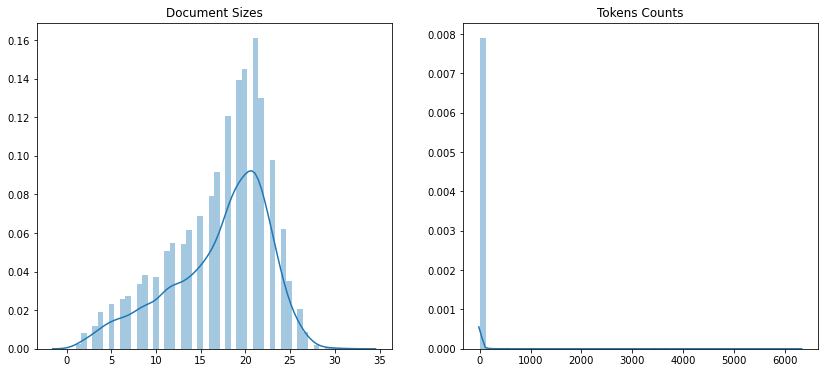

In [6]:
def summarize_data(corpus):
    """
    print statements and visualizations to summarize the corpus
    """
    
    # get the documents size
    df_doc_size = pd.Series([len(str(doc).split(" ")) for doc in corpus])
    
    # get the tokens in the corpus
    df_tokens = pd.Series([token for doc in corpus for token in str(doc).split(" ")])
    
    print("---------------------------")
    print("num docs", len(corpus))
    print("median tokens", df_doc_size.median())
    print("num tokens", len(df_tokens))
    print("unique tokens", len(df_tokens.value_counts()))
    print("---------------------------")
    
    # make plots
    fig = plt.figure(figsize=(14,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    sns.distplot(df_doc_size, ax=ax1)
    ax1.set_title("Document Sizes")
    
    sns.distplot(df_tokens.value_counts().values, ax=ax2)
    ax2.set_title("Tokens Counts")

summarize_data(df_tweets.text.values.tolist())